#  **딥러닝**

딥러닝 모델 종류
  + Sequential 모델
    - DNN: 기본적인 딥러닝 모델
    - CNN: 사진, 영상 딥러닝 모델
    - RNN: 시계열, 자연어처리 딥러닝 모델
    - AutoEncoder: 특징 추출 딥러닝 모델
    - GAN: 생성형 딥러닝 모델
    - Stable Difussion: New 생성형 딥러닝 모델

  + Transformer 모델
    - BERT(Google)
    - GPT(OpenAI)

# **MNIST 데이터를 활용한 (숫자)손글씨 분류**

 - 데이터: MNIST
   + 0~9까지의 손글씨 이미지 데이터
   + 1장의 이미지는 28x28 구성(기본)
   + 흑백(1픽셀: 0~255)
   + Train: 60,000장, Test: 10,000장
 - 데이터 변환: 정규화(Normalization)
   + Min-Max Scaler
 - 모델: CNN(2d)
 - 평가: Accuracy, F1-score, Confusion Matrix
 - 채널이 x1이면 흑백, x3이면 RGB

## 1. 모듈 로드

a. **torch**  
   - PyTorch의 핵심 패키지로, 텐서 연산, 자동 미분, 신경망을 구성하고 학습하는 데 사용

b. **torch.nn as nn**  
   - 신경망을 구성하는 레이어, 손실 함수 등을 포함한 모듈로, `nn.Module` 클래스를 상속받아 딥러닝 모델의 구조를 정의하는 데 사용.

c. **torch.optim as optim**  
   - 모델 학습을 위한 최적화 알고리즘(SGD, Adam 등)이 들어 있는 모듈로, 학습 도중 가중치를 업데이트하는 데 사용

d. **torch.nn.functional as F**  
   - 다양한 신경망 함수들을 제공하며, 활성화 함수(ReLU)나 손실 함수 등을 모델 내부에서 호출하는 데 사용

e. **torchvision.datasets**  
   - 컴퓨터 비전에서 자주 사용되는 이미지 데이터셋(MNIST, CIFAR-10 등)을 불러오는 데 사용

f. **torchvision.transforms**  
   - 이미지 데이터에 정규화, 리사이즈 등의 전처리 작업을 적용하는 데 사용

g. **matplotlib.pyplot as plt**  
   - 손실 함수의 변화나 이미지 데이터를 시각적으로 보여줄 때 시각화를 위한 모듈로 사용

h. **torch.utils.data.DataLoader**  
   - 데이터셋을 배치 단위로 나누어 학습할 수 있게 해주는 모듈로, 메모리 효율성을 높이고 학습 속도를 증가시키기 위해 사용

i. **torch.utils.data.random_split**  
   - 주어진 데이터셋을 훈련용과 검증용으로 랜덤하게 나누는 데 사용


In [ ]:
! pip install torchvision


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import random_split

## 2. 데이터셋 다운로드 및 확인

### **데이터셋 로드 및 전처리**

`transforms.Compose`를 사용하여 **이미지 데이터를 텐서(Tensor)로 변환**하고, **정규화(Normalization)**를 적용 (
 MNIST 데이터는 픽셀 값이 0~255 사이인데, 이를 -1에서 1 사이로 변환하여 모델 학습에 더 적합하게 만듦)  

`datasets.MNIST`를 사용해 **MNIST 데이터셋을 다운로드**하고, 훈련용(`train=True`)과 테스트용(`train=False`)으로 각각 로드함



* 데이터 로더 생성

`torch.utils.data.DataLoader`를 사용하여 **데이터셋을 배치 단위로 나누어 로딩**함. 훈련 데이터는 배치 크기 64로 설정하고 **셔플(Shuffle)**하여 데이터를 섞은 후, 모델이 항상 같은 순서로 학습하지 않도록 함. 테스트 데이터는 셔플하지 않고 배치 단위로 로딩함.

---


### **학습 데이터 확인**

`iter(train_loader)`를 통해 **학습 데이터에서 첫 번째 배치**를 가져옴. 이 배치에서 **이미지와 라벨**을 확인할 수 있었음.


* 첫 번째 이미지 시각화

가져온 학습 데이터의 첫 번째 이미지를 **matplotlib의 imshow 함수**를 사용해 흑백(`cmap='gray'`)으로 시각화함. **라벨**(숫자가 무엇인지)도 함께 표시하여, 이미지와 실제 값이 무엇인지를 확인함.


*  데이터 크기 확인
`len(train_set)`과 `len(test_set)`을 통해 **훈련 데이터와 테스트 데이터의 총 이미지 개수**를 출력함. 훈련 데이터는 60,000장, 테스트 데이터는 10,000장으로 구성되어 있음을 확인할 수 있었음.




In [ ]:
# 데이터셋 로드
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 데이터 로더 생성
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=False)




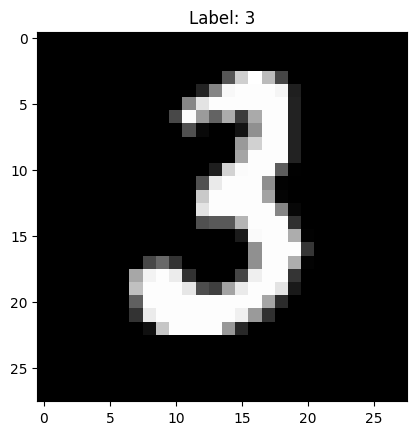

학습 데이터 크기: 60000
테스트 데이터 크기: 10000


In [ ]:
# 학습 데이터 확인
data_iter = iter(train_loader)
images, labels = next(data_iter)

# 첫 번째 이미지 시각화
plt.imshow(images[0][0], cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.show()

# 데이터 크기 확인
print(f"학습 데이터 크기: {len(train_set)}")
print(f"테스트 데이터 크기: {len(test_set)}")

## 3. 데이터 정규화

In [ ]:
# 학습 데이터와 테스트 데이터를 0~1 사이로 정규화
x_train = train_set.data.float() / 255
x_test = test_set.data.float() / 255

# 데이터의 Shape 변환
# CNN을 위한 4차원으로 변환 (batch_size, channels, height, width)
x_train = x_train.unsqueeze(1)  # 채널 1 추가
x_test = x_test.unsqueeze(1)    # 채널 1 추가

print(x_train.shape)  # (60000, 1, 28, 28)
print(x_test.shape)   # (10000, 1, 28, 28)

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


## 4. 검증 데이터 (validation data) 생성

In [ ]:
# 전체 데이터의 80%를 학습, 20%를 검증으로 나눔
train_size = int(0.8 * len(train_set))
valid_size = len(train_set) - train_size

# Train(48,000), Valid(12,000)
train_set, valid_set = random_split(train_set, [train_size, valid_size])

# 학습 데이터와 검증 데이터의 크기 확인
print(f"Train data size: {len(train_set)}")
print(f"Validation data size: {len(valid_set)}")

Train data size: 48000
Validation data size: 12000


## 5. 딥러닝(CNN) 모델 설계

#### 합성곱 레이어 및 풀링 레이어
* conv1: 첫 번째 합성곱 레이어로, 1채널(흑백) 이미지를 입력받아 16개의 필터를 사용해 처리함. 커널 크기는 5x5이며, 패딩을 2로 설정해 출력 크기를 유지함.
* pool: Max Pooling 레이어로, 2x2 크기의 풀링 필터를 사용하여 이미지 크기를 절반으로 줄임.
* conv2: 두 번째 합성곱 레이어로, 16개의 입력 채널을 받아 32개의 필터를 출력함. 커널 크기는 2x2이고, 패딩은 1임.


#### 완전 연결 레이어 및 드롭아웃

* fc1: 첫 번째 완전 연결 레이어로, 합성곱 레이어와 풀링 과정을 거친 32채널의 7x7 크기의 데이터를 100개의 뉴런으로 연결함.
* fc2: 두 번째 완전 연결 레이어로, 100개의 뉴런을 10개의 출력(0~9 손글씨 숫자 분류)으로 변환함.
* dropout: 과적합을 방지하기 위해 학습 과정에서 25%의 뉴런을 무작위로 제거함.


#### 순전파 과정

* **첫 번째 합성곱(conv1)과 풀링(pool)**을 통해 이미지의 주요 특징을 추출한 후 ReLU 활성화 함수를 사용해 비선형성을 적용함.
* 두 번째 합성곱(conv2)과 풀링을 거쳐 데이터를 평탄화(flatten) 하여 2D 이미지를 1D 벡터로 변환함.
* **완전 연결 레이어(fc1)**를 통과시킨 후, 드롭아웃을 적용해 과적합을 방지하고, fc2에서 최종 출력을 도출함.

### CNNModel 클래스를 사용해 모델을 초기화하고, print(model)을 통해 CNN 모델의 전체 구조를 확인할 수 있음.

In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=2, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 100)
        self.fc2 = nn.Linear(100, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 모델 초기화
model = CNNModel()
print(model)

CNNModel(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


## 6. 딥러닝 모델 학습을 위한 설정

* 손실 함수(Criterion): CrossEntropyLoss는 분류 문제에서 사용되는 손실 함수로, 모델이 예측한 값과 실제 정답 사이의 차이를 계산하여 모델의 성능을 평가하는 데 사용됨.

* 최적화 함수(Optimizer): Adam 옵티마이저는 가중치 업데이트를 효율적으로 하기 위한 최적화 알고리즘으로, 학습률(lr)은 0.001로 설정함. Adam은 SGD보다 빠르고 적응적인 학습이 가능함.

* Early Stopping: 모델이 학습 중 과적합을 방지하기 위해, 성능이 개선되지 않으면 학습을 조기에 중단하는 방법. **patience**는 성능이 개선되지 않아도 기다리는 횟수를 의미하며, 여기서는 3번으로 설정됨.

* best_loss: 현재까지 가장 낮은 손실 값을 저장하기 위한 변수로, 초기값은 무한대로 설정됨.

* early_stopping_counter: 성능 개선이 이루어지지 않은 에포크 수를 추적하는 변수로, 이 값이 early_stopping_patience를 초과하면 학습이 중단됨.

In [ ]:
# 손실 함수와 최적화 함수 정의
criterion = nn.CrossEntropyLoss()  # 분류 문제이므로 CrossEntropyLoss 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer 사용

# Early Stopping을 위한 변수 설정
early_stopping_patience = 3
best_loss = float('inf')
early_stopping_counter = 0

## 7. 딥러닝 모델 학습



* Epoch 반복: num_epochs = 5로 설정하여 모델을 5번 반복해서 학습시킴. epoch은 전체 학습 데이터가 한 번씩 모델을 통과하는 과정임.

* 모델 학습 모드: model.train()을 호출하여 모델을 학습 모드로 전환함. 이 모드에서는 드롭아웃과 같은 레이어가 활성화됨.

* 경사 초기화: optimizer.zero_grad()를 사용해 이전 배치에서 계산된 경사를 초기화함.

* 순전파: 입력 데이터를 모델에 넣어 예측값(outputs)을 생성함.

* 손실 계산: criterion(CrossEntropyLoss)을 사용해 모델의 예측값과 실제 라벨(labels) 간의 **손실(loss)**을 계산함.

* 역전파: loss.backward()를 호출하여 역전파를 통해 경사를 계산하고, 모델의 파라미터에 대한 그래디언트를 계산함.

* 가중치 갱신: optimizer.step()을 호출하여 경사 하강법을 통해 가중치를 갱신함.

In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()  # 경사 초기화
        outputs = model(inputs)  # 순전파
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 갱신

        running_loss += loss.item()

    # 검증 데이터에 대한 성능 평가
    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {running_loss / len(train_loader)}, Validation Loss: {valid_loss / len(test_loader)}")



Epoch [1/5], Training Loss: 0.2717101652426387, Validation Loss: 0.06079215464808023
Epoch [2/5], Training Loss: 0.0846850287436303, Validation Loss: 0.03912821759895798
Epoch [3/5], Training Loss: 0.06393228004103713, Validation Loss: 0.033431166095675265
Epoch [4/5], Training Loss: 0.05248750388837739, Validation Loss: 0.03671887713145879
Epoch [5/5], Training Loss: 0.046278531305310226, Validation Loss: 0.02904873142343042


## 8. 딥러닝 모델 평가

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


* torch.no_grad(): 평가 시에는 역전파를 비활성화하여 메모리와 계산 비용을 절약함.
* torch.max(outputs, 1): 각 입력에 대해 **최대값을 가진 클래스(예측 값)**를 반환함.
* y_pred와 y_true에 예측 값과 실제 라벨을 저장하여 성능 평가에 사용함.

* accuracy_score: 모델의 **정확도(Accuracy)**를 계산함. 전체 예측 중 맞춘 비율을 나타냄.

* Test Accuracy는 0.9898로 출력됨, 이는 모델이 테스트 데이터에서 약 98.98%의 정확도를 보였다는 의미임.

* F1 스코어: 모델의 **정확도와 재현율(Recall)**을 모두 고려한 성능 지표로, 불균형한 데이터에서 더 유용함.

* weighted average를 사용해 각 클래스의 비율을 고려한 F1 스코어를 계산함.

* Test F1은 0.9898로 출력됨.

* 혼동 행렬(Confusion Matrix): 각 클래스별로 실제 값과 예측 값의 분포를 보여줌. 혼동 행렬을 통해 모델이 어느 클래스에서 잘못 예측했는지 확인할 수 있음.

* 출력된 혼동 행렬은 10개의 숫자 클래스(0~9)에 대한 예측 결과를 보여줌.

In [ ]:
 # 모델 평가 모드로 전환
model.eval()

# 예측 및 정확도 계산
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

# 정확도 계산
accuracy = accuracy_score(y_true, y_pred)
print(f'Test Accuracy: {accuracy}')

# F1 스코어 계산
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Test F1: {f1}')

# 혼동 행렬 출력
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)


Test Accuracy: 0.9898
Test F1: 0.9897942191412638
Confusion Matrix:
[[ 976    0    0    1    0    0    1    0    2    0]
 [   0 1132    1    0    0    0    1    1    0    0]
 [   2    0 1027    0    1    0    0    2    0    0]
 [   1    0    1 1000    0    3    0    3    2    0]
 [   0    0    0    0  975    0    0    0    1    6]
 [   2    0    0    2    0  884    3    0    0    1]
 [   6    5    0    0    3    3  940    0    1    0]
 [   0    1    7    1    0    0    0 1016    1    2]
 [   4    1    3    3    1    1    0    2  955    4]
 [   0    1    0    0    2    5    0    5    3  993]]


**성능 결과**

* 정확도(Accuracy): 98.98%로 모델이 테스트 데이터에서 매우 높은 성능을 보여줌.

* F1 스코어: 0.9898로, 정확도와 재현율을 함께 고려한 성능 지표에서 높은 성능을 나타냄.

* 혼동 행렬을 통해 모델이 예측을 잘한 부분과 오차가 발생한 부분을 구체적으로 확인할 수 있음.
